In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt 
%matplotlib inline

In [36]:
df = pd.read_csv('C:/Users/Sort/Desktop/gd_sec_sales.csv',encoding = 'utf-8')

In [37]:
df.head(10)

,Retailer_id,District_name,Retailer_code,Retailer_name,Jan-14,Feb-14,Mar-14,Apr-14,May-14,Jun-14,...,Jul-15,Aug-15,Sep-15,Oct-15,Nov-15,Dec-15,Q1,Q2,Q3,Q4
0,749,Amritsar,100000-1731--0656981,Nagpal Beez Str,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,878.10,586.88,0,0,0,2
1,750,Amritsar,100000-1731--0656982,Raman Kumar Sita Ram,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,130.26,0,0,0,1
2,751,Amritsar,100000-1731--0656983,Guru Ram Das General,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,2177.72,0.00,0,0,0,1
3,752,Amritsar,100000-1731--0656984,New Chopra Bakrey,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,497.59,0.00,2581.65,0,0,0,2
4,753,Amritsar,100000-1731--0656985,Pawan Kumar Ammi Cha,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,0
5,754,Amritsar,100000-1731--0656986,Chiman Lal Raj Kumar,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,292.7,3371.94,2078.20,2321.15,0,0,0,4
6,755,Amritsar,100000-1731--0656987,Rajan General Str,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,199.04,0.00,569.31,0,0,0,2
7,756,Amritsar,100000-1731--0656989,Pashoria Kirana Stor,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,8956.80,0,0,0,1
8,757,Amritsar,100000-1731--0656990,Happy Di Hatti,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1949.40,0.00,0.00,0,0,0,1
9,758,Amritsar,100000-1731--0656991,Arora General Str,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,298.56,515.16,0,0,0,2


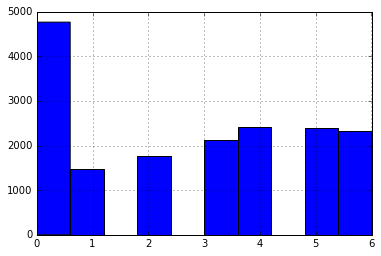

In [4]:
df['Q1'].hist()

In [38]:
def classify(Q1,Q2,Q3,Q4):
    if Q1 == 0 and Q2 == 0 and Q3 == 0 and Q4 == 0:
        result ='Lapsed'    
    elif Q1 == 0 and Q2 == 0 and (Q3 > 0 or Q3 == 0) and Q4 > 0:
        result = 'New entrant >6'
    elif Q1 > 0 and (Q2 == 0 or Q2 > 0) and Q3 == 0 and Q4 == 0:
        result = 'Lapsed >6'
    elif Q1 in range(3,6) and Q2 in range(3,6) and Q3 in range(3,6) and Q4 in range(3,6):
        result = 'Fickle/Demand oriented'
    elif Q1 == 6 and Q2 == 6 and Q3 == 6 and Q4 == 6:
        result = 'All Weather'
    else:
        result = 'Seasonal'
    return result
    
    

In [39]:
df['Classify'] = list(map(classify, df["Q1"], df["Q2"], df["Q3"], df["Q4"]))

In [40]:
df.tail(10)


,Retailer_id,District_name,Retailer_code,Retailer_name,Jan-14,Feb-14,Mar-14,Apr-14,May-14,Jun-14,...,Aug-15,Sep-15,Oct-15,Nov-15,Dec-15,Q1,Q2,Q3,Q4,Classify
17638,2650,Ludhiana,100000-307-0112543,Kasturi Lal Mahesh K,252896.0,170399.1,131560.8,345178.7,374816.52,339962.86,...,0.0,0.0,0.0,0.0,0.0,6,0,0,0,Lapsed >6
17639,2649,Moga,100000-307-0112542,Davinder Kumar & Co,572089.0,365089.1,501286.5,355196.9,649420.80,434647.50,...,0.0,0.0,0.0,0.0,0.0,6,0,0,0,Lapsed >6
17640,4866,Moga,100000-349-0301321,V.K.Agencies,317774.5,126232.1,214723.5,133234.2,238035.78,319832.18,...,0.0,0.0,0.0,0.0,0.0,6,0,0,0,Lapsed >6
17641,4070,Muktsar,100000-344-0298097,Sagan Lal Harbans La,24474.5,43103.7,18887.5,21534.7,69342.52,0.00,...,0.0,0.0,0.0,0.0,0.0,5,0,0,0,Lapsed >6
17642,4971,Patiala,100000-352-0302832,Madan Lal Vinod Kuma,175062.0,143091.8,148864.4,157591.2,377887.80,406652.00,...,0.0,0.0,0.0,0.0,0.0,6,0,0,0,Lapsed >6
17643,4990,Patiala,100000-352-0302860,M/S Sahil Enterprise,225710.4,93271.3,167109.5,115900.4,376584.72,266068.18,...,0.0,0.0,0.0,0.0,0.0,6,0,0,0,Lapsed >6
17644,4968,Sangrur,100000-352-0302828,Garg Trading Co.,43138.0,66579.4,24490.6,67556.0,118095.38,106121.50,...,0.0,0.0,0.0,0.0,0.0,6,2,0,0,Lapsed >6
17645,4970,Sangrur,100000-352-0302830,M/S Bobby Gen. Str,14265.0,31726.0,1426.5,14265.0,80279.20,31916.50,...,0.0,0.0,0.0,0.0,0.0,6,2,0,0,Lapsed >6
17646,4976,Sangrur,100000-352-0302840,Nirnkari Confectione,14436.5,27377.9,7132.5,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,3,0,0,0,Lapsed >6
17647,4994,Sangrur,100000-352-0530890,Bansal Conf. Str,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0,2,0,0,Seasonal


In [41]:
df.head(10)

,Retailer_id,District_name,Retailer_code,Retailer_name,Jan-14,Feb-14,Mar-14,Apr-14,May-14,Jun-14,...,Aug-15,Sep-15,Oct-15,Nov-15,Dec-15,Q1,Q2,Q3,Q4,Classify
0,749,Amritsar,100000-1731--0656981,Nagpal Beez Str,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,878.10,586.88,0,0,0,2,New entrant >6
1,750,Amritsar,100000-1731--0656982,Raman Kumar Sita Ram,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,130.26,0,0,0,1,New entrant >6
2,751,Amritsar,100000-1731--0656983,Guru Ram Das General,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,2177.72,0.00,0,0,0,1,New entrant >6
3,752,Amritsar,100000-1731--0656984,New Chopra Bakrey,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,497.59,0.00,2581.65,0,0,0,2,New entrant >6
4,753,Amritsar,100000-1731--0656985,Pawan Kumar Ammi Cha,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0,0,0,0,Lapsed
5,754,Amritsar,100000-1731--0656986,Chiman Lal Raj Kumar,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,292.7,3371.94,2078.20,2321.15,0,0,0,4,New entrant >6
6,755,Amritsar,100000-1731--0656987,Rajan General Str,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,199.04,0.00,569.31,0,0,0,2,New entrant >6
7,756,Amritsar,100000-1731--0656989,Pashoria Kirana Stor,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,8956.80,0,0,0,1,New entrant >6
8,757,Amritsar,100000-1731--0656990,Happy Di Hatti,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1949.40,0.00,0.00,0,0,0,1,New entrant >6
9,758,Amritsar,100000-1731--0656991,Arora General Str,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,298.56,515.16,0,0,0,2,New entrant >6


In [42]:
df.to_csv('C:/Users/Sort/Desktop/out2.csv')

TypeError: unorderable types: str() < float()

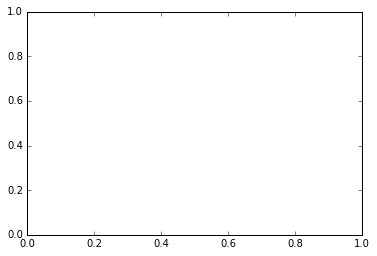